# Jupyter install R

```
install.packages(c("repr", "IRdisplay", "evaluate", "crayon", "pbdZMQ", "devtools", "uuid", "digest"))
devtools::install_github("IRkernel/IRkernel")
IRkernel::installspec(user = FALSE)
install.packages('IRkernel')

```

## Class 1 script

[1] "^VIX"

[1] "^GSPC"

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2008-10-01    39.39    89.53   39.39     59.89          0        59.89
                 rtn
2008-10-01 0.4189976

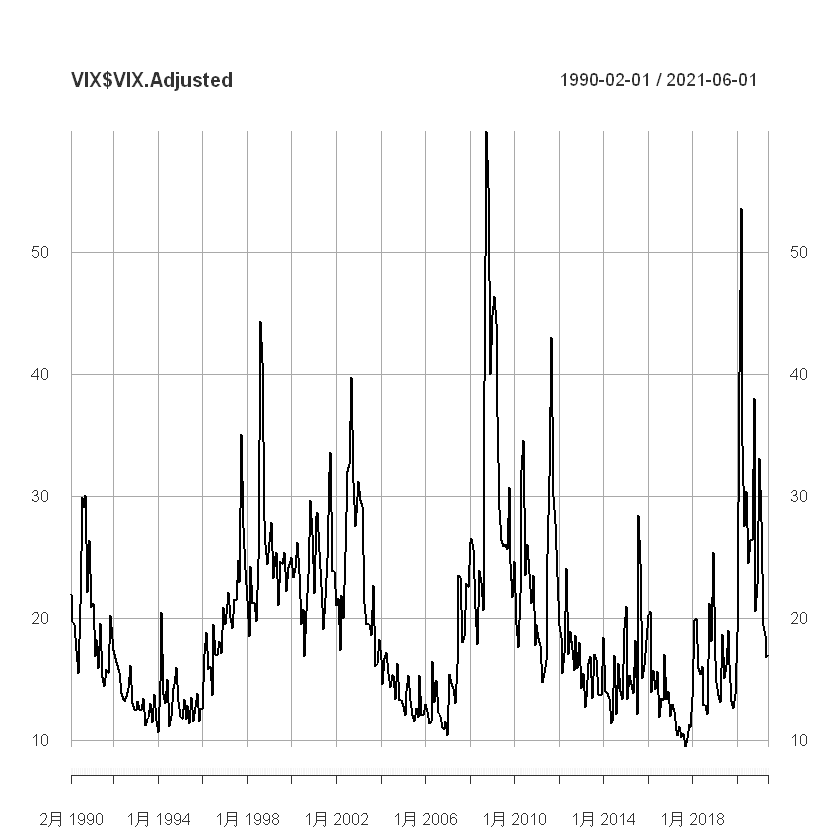

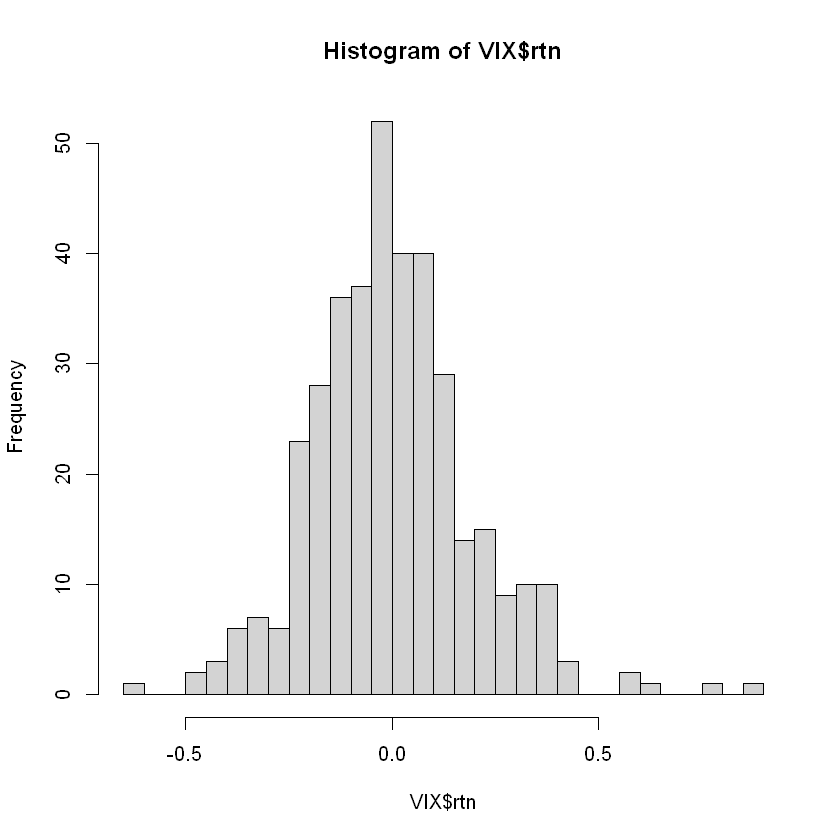

In [12]:
library(quantmod)

# Get data of VIX - CBOE Volatility Index 隐含波动率
# 当VIX越高时，表示市场参与者预期后市波动程度会更加激烈同时也反映其不安的心理状态
getSymbols(c("^VIX"),from="1990-01-01",periodicity = "monthly")

# S&P 500
getSymbols(c("^GSPC"),from="1990-01-01",periodicity = "monthly")
GSPC$rtn = diff(log(GSPC$GSPC.Adjusted))[-1]

VIX$rtn = diff(log(VIX$VIX.Adjusted))[-1]
VIX[which.max(VIX$VIX.Adjusted)] # the highest

plot(VIX$VIX.Adjusted)
hist(VIX$rtn,breaks=50)
abline(v=mean(VIX$rtn),col="green") #add one more straight line into current page




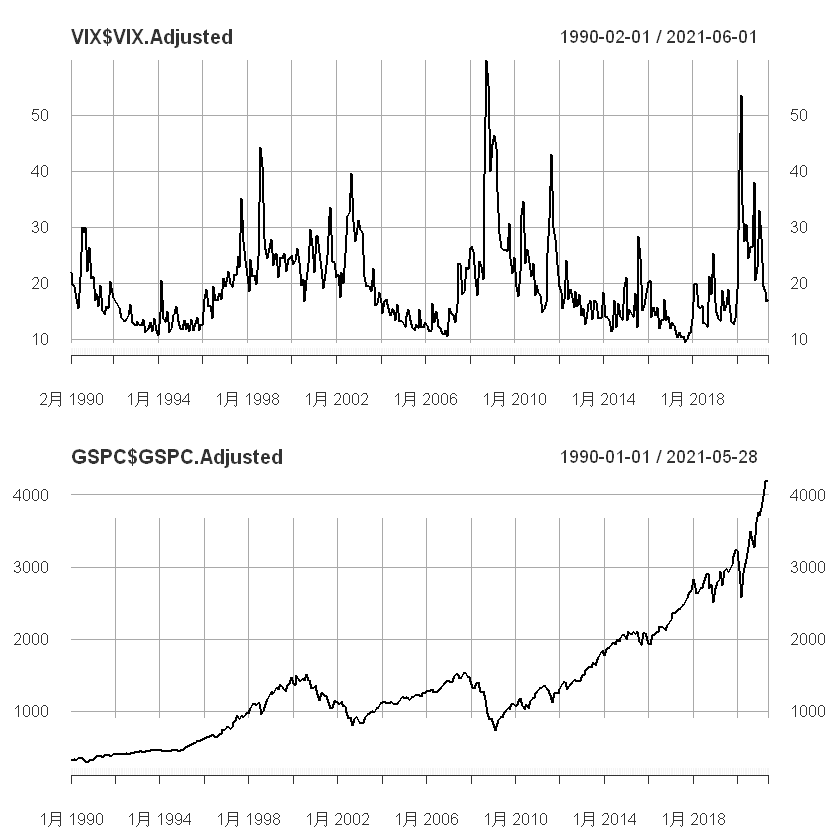

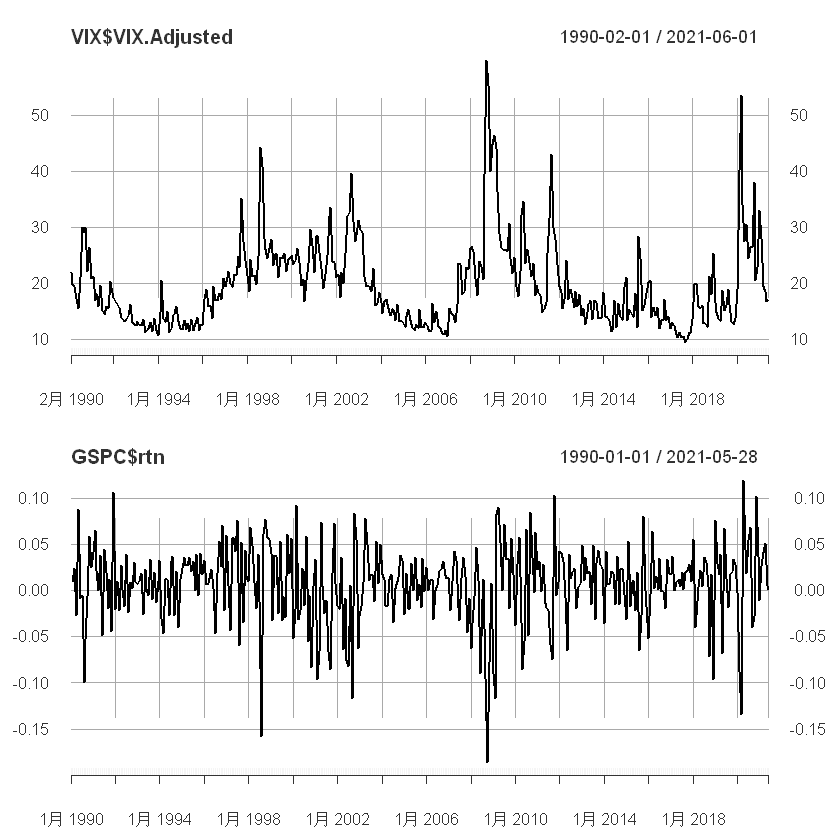

In [13]:
# VIX vs S&P 500 
par(mfrow = c(2,1))
plot(VIX$VIX.Adjusted)
plot(GSPC$GSPC.Adjusted)

GSPC$rtn = diff(log(GSPC$GSPC.Adjusted))[-1]
par(mfrow = c(2,1))
plot(VIX$VIX.Adjusted)
plot(GSPC$rtn)

### Multiple Return type
1. one-period simple return 
2. multi-period simple return
3. annualized simple return
4. portfolio return: N assets
5. dividend payment
6. excess return



In [40]:
# distribution of the series
# Multiple feature can be checked
# Mean/Variance/Skewness(Symmetry)/Kurtosis(Fat-tails)
library("fBasics")
VIX.rtn = diff(log(VIX$VIX.Adjusted))[-1]
basicStats(VIX.rtn)

print("skewness: ")
skewness(VIX.rtn)
print("kurtosis: ")
kurtosis(VIX.rtn)

t.test(VIX.rtn)

normalTest(VIX.rtn,method="jb")

,VIX.Adjusted
,<dbl>
nobs,376.000000
NAs,0.000000
Minimum,-0.614279
Maximum,0.852588
1. Quartile,-0.117227
3. Quartile,0.100679
Mean,-0.000677
Median,-0.011353
Sum,-0.254438


[1] "skewness: "


[1] 0.5230243
attr(,"method")
[1] "moment"

[1] "kurtosis: "


[1] 1.524913
attr(,"method")
[1] "excess"

Warning message in tstat + c(-cint, cint):
"Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in cint * stderr:
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"



	One Sample t-test

data:  VIX.rtn
t = -0.067385, df = 375, p-value = 0.9463
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.02042275  0.01906936
sample estimates:
    mean of x 
-0.0006766959 


Warning message in if (class(x) == "fREG") x = residuals(x):
"条件的长度大于一，因此只能用其第一元素"



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 54.8747
  P VALUE:
    Asymptotic p Value: 1.214e-12 

Description:
 Tue Jun 01 23:12:04 2021 by user: YYD


## Class 2 Script
